<a href="https://colab.research.google.com/github/shmilyface/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/DS_Unit_1_Sprint_Challenge_2_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

In [464]:
 cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [465]:
cell_phones.shape

(9215, 3)

In [466]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [467]:
population.shape

(59297, 3)

In [468]:
geo_country_codes.head()

,geo,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.5,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.5,18.5,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [469]:
geo_country_codes.shape

(273, 33)

In [470]:
cell_phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9215 entries, 0 to 9214
Data columns (total 3 columns):
geo                  9215 non-null object
time                 9215 non-null int64
cell_phones_total    9215 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 216.1+ KB


In [0]:
#cell_phones['time'] = pd.to_datetime(cell_phones['time'])

In [472]:
cell_phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9215 entries, 0 to 9214
Data columns (total 3 columns):
geo                  9215 non-null object
time                 9215 non-null int64
cell_phones_total    9215 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 216.1+ KB


### Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [473]:
cell_pop = pd.merge(cell_phones, population, how='inner', on=['geo', 'time'])

cell_pop.shape

(8590, 4)

Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [474]:
cells = pd.merge(cell_pop,
                 geo_country_codes[['geo', 'country']],
                 how='inner', on='geo')
cells.shape


(8590, 5)

In [475]:
cells

,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan
5,afg,1977,0.0,13067538,Afghanistan
6,afg,1978,0.0,13237734,Afghanistan
7,afg,1979,0.0,13306695,Afghanistan
8,afg,1980,0.0,13248370,Afghanistan
9,afg,1981,0.0,13053954,Afghanistan


***Optional bonus for Part 1: Take initiative to join more data.***

### Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [476]:
cell_per_person = cells['cell_phones_total'] / cells['population_total']

cells['cell_per_person'] = cell_per_person

cells

,geo,time,cell_phones_total,population_total,country,cell_per_person
0,afg,1960,0.0,8996351,Afghanistan,0.0
1,afg,1965,0.0,9938414,Afghanistan,0.0
2,afg,1970,0.0,11126123,Afghanistan,0.0
3,afg,1975,0.0,12590286,Afghanistan,0.0
4,afg,1976,0.0,12840299,Afghanistan,0.0
5,afg,1977,0.0,13067538,Afghanistan,0.0
6,afg,1978,0.0,13237734,Afghanistan,0.0
7,afg,1979,0.0,13306695,Afghanistan,0.0
8,afg,1980,0.0,13248370,Afghanistan,0.0
9,afg,1981,0.0,13053954,Afghanistan,0.0


In [477]:
cells.loc[cells['country'] == 'United States']

,geo,time,cell_phones_total,population_total,country,cell_per_person
8092,usa,1960,0.0,186808228,United States,0.0
8093,usa,1965,0.0,199815540,United States,0.0
8094,usa,1970,0.0,209588150,United States,0.0
8095,usa,1975,0.0,219205296,United States,0.0
8096,usa,1976,0.0,221239215,United States,0.0
8097,usa,1977,0.0,223324042,United States,0.0
8098,usa,1978,0.0,225449657,United States,0.0
8099,usa,1979,0.0,227599878,United States,0.0
8100,usa,1980,0.0,229763052,United States,0.0
8101,usa,1984,"91,600.0",238573861,United States,0.0003839481811462992


Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [478]:
cells['geo'] = cells['geo'].str.upper()

cells.head()

,geo,time,cell_phones_total,population_total,country,cell_per_person
0,AFG,1960,0.0,8996351,Afghanistan,0.0
1,AFG,1965,0.0,9938414,Afghanistan,0.0
2,AFG,1970,0.0,11126123,Afghanistan,0.0
3,AFG,1975,0.0,12590286,Afghanistan,0.0
4,AFG,1976,0.0,12840299,Afghanistan,0.0


***Optional bonus for Part 2: Take initiative to make more features.***

### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [479]:
cells.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
geo,8590,195,BEN,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,"8,590.0",NaN,NaN,NaN,"1,994.1934807916182",14.257974607310302,"1,960.0","1,983.0","1,995.0","2,006.0","2,017.0"
cell_phones_total,"8,590.0",NaN,NaN,NaN,"9,004,949.642905472","55,734,084.872179635",0.0,0.0,"6,200.0","1,697,652.0","1,474,097,000.0"
population_total,"8,590.0",NaN,NaN,NaN,"29,838,230.581722934","116,128,377.47477299","4,433.0","1,456,148.0","5,725,062.5","18,105,812.0","1,409,517,397.0"
country,8590,195,Poland,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cell_per_person,"8,590.0",NaN,NaN,NaN,0.2796385558059151,0.454246656214052,0.0,0.0,0.0015636266438163813,0.4611491855201403,2.490242818521353


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

In [481]:
byMost = cells[cells['time'] == 2017].sort_values('cell_phones_total', ascending=False)
byMost[['country', 'cell_phones_total']].head(5)


,country,cell_phones_total
1496,China,"1,474,097,000.0"
3595,India,"1,168,902,277.0"
3549,Indonesia,"458,923,202.0"
8134,United States,"395,881,000.0"
1084,Brazil,"236,488,548.0"


In [0]:
#cells.sort_value('country', 'cell_phones_total', index=time)

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

***Optional bonus for Part 3: Take initiative to do more exploratory data analysis.***

### (OPTIONAL) Part 4. Reshape data

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

If you have the time and curiosity, what other questions can you ask and answer with this data?

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

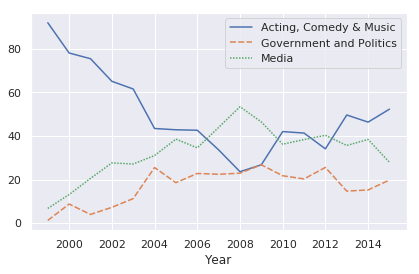

In [483]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'


sns.lineplot(data=ct)

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus Challenge:** Do additional insightful data exploration.

In [487]:
sns.set_palette(sns.color_palette(['blue', 'red', 'purple']))
df['Occupation'] = df['Group'].apply(get_occupation)
ct = pd.crosstab(df['Year'], df['Occupation'])
ct = ct.apply(lambda r: round(r / r.sum() * 100, 2), axis=1)
ct.drop('Other', axis=1, inplace=True)
ct

Occupation,"Acting, Comedy & Music",Government and Politics,Media
Year,,,
1999,90.36,1.2,6.63
2000,73.96,8.28,12.43
2001,72.61,3.82,19.75
2002,62.26,6.92,26.42
2003,56.02,10.24,24.7
2004,38.41,22.56,27.44
2005,37.04,16.05,33.33
2006,36.02,19.25,29.19
2007,25.53,17.02,33.33


### Part 2 — Recreate this explanatory visualization:

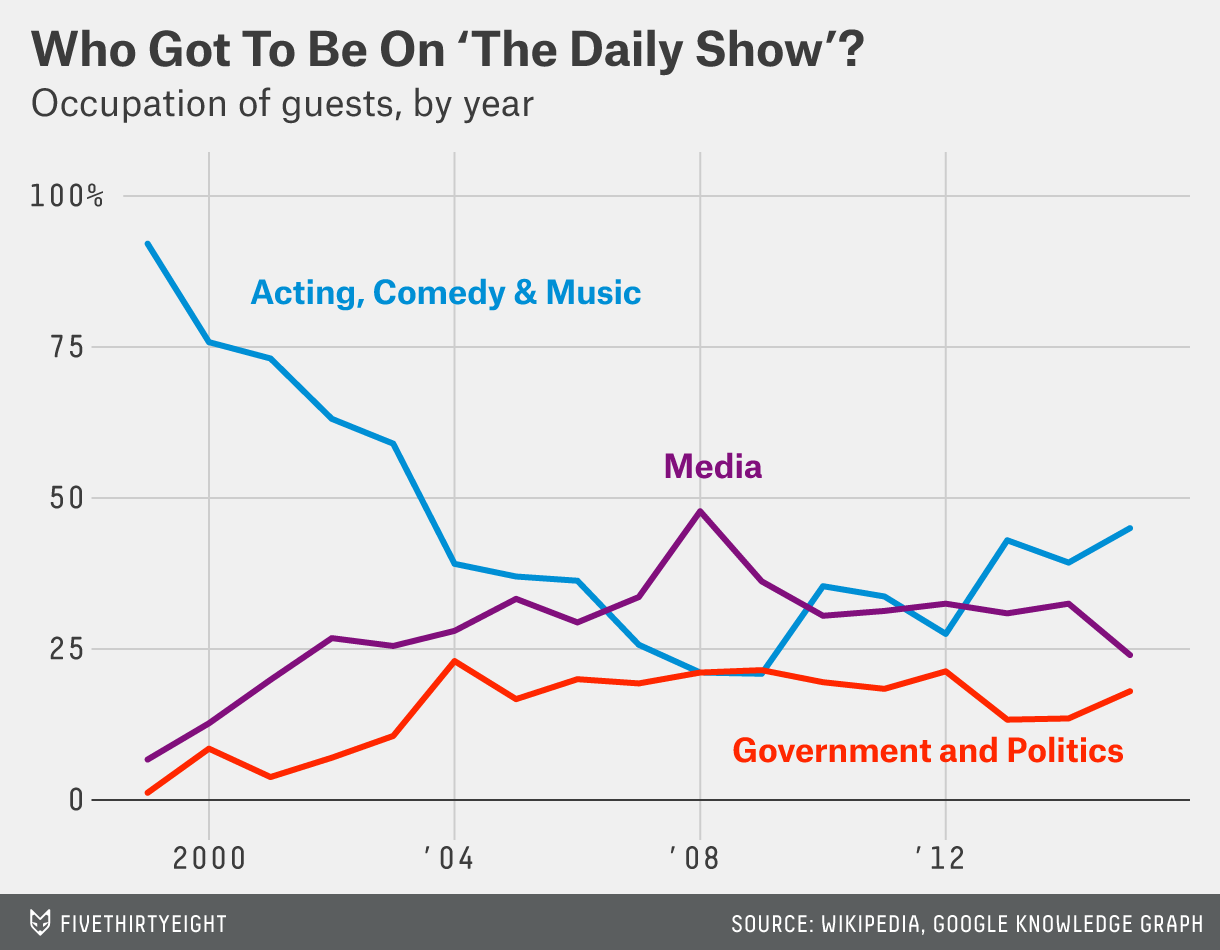

In [485]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

Text(-0.05, 1.05, 'Occupations of guests, By year')

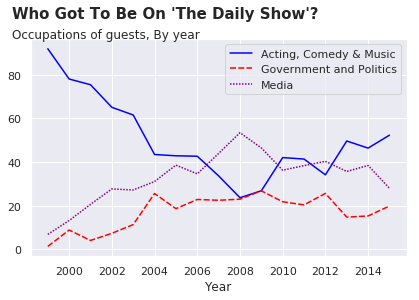

In [486]:
sns.set_style('darkgrid')
ax = sns.lineplot(data=ct)
#ax.text(x=1, y=100, s="Who Got To Be On 'The Daily Show'?", fontsize='15', fontweight='bold');
#ax.text(x=1, y=90, s="Occupations of guests, by year",
       #fontsize=12)

ax.text(  -0.05, 1.15, "Who Got To Be On 'The Daily Show'?", ha="left", va="top", fontsize='15', fontweight='bold', transform=ax.transAxes, )

ax.text(-0.05, 1.05, "Occupations of guests, By year", ha="left", va="top", fontsize='12', transform=ax.transAxes)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

### (OPTIONAL) Part 3 — Who were the top 10 guests on _The Daily Show_?

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

**Make a plot** that shows their names and number of appearances.

**Add a title** of your choice.

**Expectations:** It's ok to make a simple, quick plot: exploratory, instead of explanatory. 

**Optional Bonus Challenge:** You can change aesthetics and add more annotation. For example, in a relevant location, could you add the text "19" to show that Fareed Zakaria appeared 19 times on _The Daily Show_? (And so on, for each of the top 10 guests.)